# ES(1+1) with 1/5 Rule (With the exception of the most irrelevant data parameters)

Name: Batyr Kenzheakhmetov

ID: 000801267

Honor Code: "I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else's work as my own."

In [ ]:
import kagglehub as kaggle
import pandas as pd
import numpy as np
import os

path = kaggle.dataset_download("cherngs/heart-disease-cleveland-uci")
print("Path to dataset files: ", path)

path = "/root/.cache/kagglehub/datasets/cherngs/heart-disease-cleveland-uci/versions/1"
print("Files in the directory:", os.listdir(path))

diabetes_data = pd.read_csv(os.path.join(path, 'heart_cleveland_upload.csv'))
print(diabetes_data.shape)
diabetes_data.head()

100%|██████████| 3.33k/3.33k [00:00<00:00, 4.52MB/s]

Extracting files...
Path to dataset files:  /root/.cache/kagglehub/datasets/cherngs/heart-disease-cleveland-uci/versions/1
Files in the directory: ['heart_cleveland_upload.csv']
(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
diabetes_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Statistical Relevance:

Perform a correlation analysis between each feature and the target variable (condition). Low correlation might indicate irrelevance.

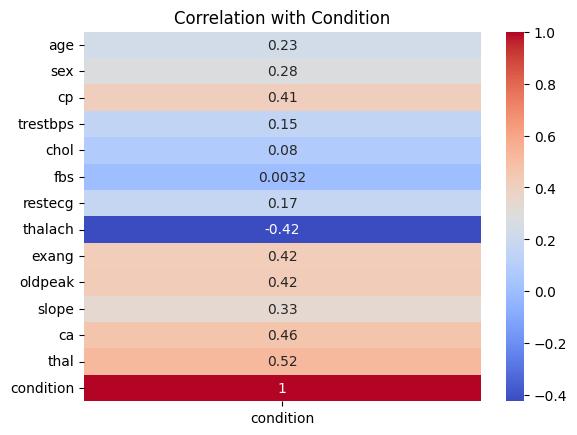

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = diabetes_data.corr()
sns.heatmap(correlation[['condition']], annot=True, cmap='coolwarm')
plt.title('Correlation with Condition')
plt.show()

Features with Low Correlation (Potentially Irrelevant):
*   fbs (Fasting Blood Sugar)
*   chol (Cholesterol)
*   trestbps (Resting Blood Pressure)
*   restecg (Resting Electrocardiographic Results)

Features with Stronger Correlation (Likely Relevant):
*   thal (Thalassemia)
*   ca (Number of Major Vessels)
*   cp (Chest Pain Type)
*   exang (Exercise-Induced Angina)
*   thalach (Maximum Heart Rate Achieved)
*   oldpeak (ST Depression Induced by Exercise)
*   slope (Slope of the Peak Exercise ST Segment)
*   sex


Recommendations:

Drop or deprioritize low-correlation features: Consider removing fbs, chol, trestbps, and restecg if feature selection is required, as they contribute little predictive value.

Focus on high-correlation features: Prioritize features like thal, ca, cp, thalach, and oldpeak during model training.







In [ ]:
from sklearn.model_selection import train_test_split

#X = diabetes_data.iloc[:,0:13] #0-13 columns are dependent variables
X = diabetes_data.to_numpy()[:,0:13]
#y = diabetes_data.iloc[:,13]   #13 column is independent variable (label)
y = diabetes_data.to_numpy()[:,13]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=None)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(222, 13)
(222,)
(75, 13)
(75,)
[0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1.]


# Feature Importance with Machine Learning:

We using a model like Random Forest or Logistic Regression to assess feature importance. Features with low importance scores are likely not contributing significantly to the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Use original feature names from the DataFrame
feature_names = diabetes_data.drop(columns=['condition']).columns

importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {feature_names[i]}, Importance: {v:.4f}")

Feature: age, Importance: 0.0908
Feature: sex, Importance: 0.0324
Feature: cp, Importance: 0.1127
Feature: trestbps, Importance: 0.0781
Feature: chol, Importance: 0.0810
Feature: fbs, Importance: 0.0071
Feature: restecg, Importance: 0.0168
Feature: thalach, Importance: 0.1341
Feature: exang, Importance: 0.0468
Feature: oldpeak, Importance: 0.1102
Feature: slope, Importance: 0.0619
Feature: ca, Importance: 0.1000
Feature: thal, Importance: 0.1282


Moderately Important Features:
*   chol (Cholesterol): 0.0810
*   trestbps (Resting Blood Pressure): 0.0781
*   slope (Slope of the ST Segment): 0.0619

Least Important Features:
*   fbs (Fasting Blood Sugar): 0.0071
*   restecg (Resting Electrocardiographic Results): 0.0168
*   sex: 0.0324
*   exang (Exercise-Induced Angina): 0.0468

These features have the lowest importance scores. While they might add some information, their contribution is minimal, and we could consider dropping them to simplify the model without significant performance loss.







# Statistical Tests:

Conduct statistical tests (e.g., ANOVA for numerical features, chi-square for categorical features) to determine whether each feature is significantly associated with the target variable.

Small p-values (< 0.05): These features have a statistically significant relationship with the target variable (condition).

Large p-values (≥ 0.05): These features are less likely to contribute significantly to the target and may be considered for removal or deprioritization.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Get all feature names from the original DataFrame
all_feature_names = diabetes_data.drop(columns=['condition']).columns

# Convert x_train to DataFrame with correct feature names
x_train_df = pd.DataFrame(x_train, columns=all_feature_names)

# Perform ANOVA test for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    f_stat, p_val = f_oneway(x_train_df[feature], y_train)
    print(f"{feature}: p-value = {p_val:.4e}")



age: p-value = 3.3871e-285
trestbps: p-value = 0.0000e+00
chol: p-value = 3.0616e-239
thalach: p-value = 5.6082e-292
oldpeak: p-value = 5.6775e-13


All the tested numerical features (age, trestbps, chol, thalach, and oldpeak) are highly significant for predicting heart disease risk. They should be included in the model

In [ ]:
from scipy.stats import f_oneway

# List of remaining features (categorical/ordinal)
remaining_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Perform ANOVA test for each remaining feature
for feature in remaining_features:
    f_stat, p_val = f_oneway(x_train_df[feature], y_train)
    print(f"{feature}: p-value = {p_val:.4e}")


sex: p-value = 5.2561e-07
cp: p-value = 2.6425e-81
fbs: p-value = 6.6141e-12
restecg: p-value = 1.1667e-13
exang: p-value = 1.4259e-02
slope: p-value = 1.4295e-03
ca: p-value = 5.1118e-03
thal: p-value = 2.3295e-07


All values ​​are very important, which means that if we consider these values not ​​in comparison with others, then they are necessary to show the best result. In other words, they are important as independent indicators.

# Features to Drop:
**fbs (Fasting Blood Sugar):**

Despite being statistically significant (p-value = 6.61e-12), its importance in the Random Forest model was extremely low (0.0071).

Clinically, fasting blood sugar alone is often not a strong predictor of heart disease compared to other features.

**restecg (Resting Electrocardiographic Results):**

While statistically significant (p-value = 1.17e-13), its feature importance (0.0168) in the model is low.

This indicates it contributes minimally to the prediction task.

**exang (Exercise-Induced Angina):**

Statistically significant (p-value = 1.42e-02), but it has a low feature importance score (0.0468) compared to other features.

Dropping it might slightly simplify the model without a major impact on performance.

# Training Part

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert data to NumPy array
data_array = diabetes_data.to_numpy()

# Define independent (X) and dependent (y) variables
# Drop columns for 'fbs' (5), 'restecg' (6), and 'exang' (8)
X = np.delete(data_array[:, 0:13], [5, 6, 8], axis=1)
y = data_array[:, 13]  # Column 13 is the target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

# Print shapes for verification
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(222, 10)
(222,)
(75, 10)
(75,)


## Model I (with two hidden layers)

ES(1+1) with 1/2 Rule

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras import optimizers
from keras import callbacks

act_func = ('relu', 'elu', 'sigmoid', 'tanh')
optimz = ('SGD', 'RMSprop', 'Adam')


def RecFunc(param):
  model = Sequential()
  model.add(Input(shape=(10,)))
  for _ in range(2):
    model.add(Dense(int(param[0]), activation=act_func[round(param[3])]))
  model.add(Dense(1, activation='sigmoid'))

  if ( param[4] == 0 ):
    optmzr = optimizers.SGD(learning_rate=param[1]) # stochastic gradient decent
  elif ( param[4] == 1 ):
    optmzr = optimizers.RMSprop(learning_rate=param[1])
  elif ( param[4] == 2 ):
    optmzr = optimizers.Adam(learning_rate=param[1])

  model.compile(optimizer=optmzr, loss='binary_crossentropy', metrics=['accuracy'])
  cb_list = [
      callbacks.EarlyStopping(monitor='val_loss', patience=4,
                              restore_best_weights=True),
    ]

  model.fit(x_train, y_train, epochs=250, batch_size=int(param[2]), verbose=0,
            validation_data=(x_test, y_test),
            callbacks=cb_list)

  (loss, acc) = model.evaluate(x_test, y_test, verbose=0)

  return loss, acc

In [ ]:
# to test a set of parameters
pr = np.empty(5)
pr[0] = 8   # num hidden neuron
pr[1] = 0.01 # lr
pr[2] = 4   # batch size
pr[3] = 0   # act_func
pr[4] = 0   # optimizer
print(RecFunc(pr))

(0.6867285370826721, 0.5866666436195374)


In [ ]:
# Constants
MaxGen = 1000
MaxTrial = 5
numVar = 5

# acceptable range for each hyper parameter
low0 = 8  # number of hidden neurons
high0 = 512
low1  = 0.01 # smallest learning rate
high1 = 1.5
low2  = 1 # min batch size
high2 = 16

totgen = 0
foundCnt = 0  # acceptable solution found
objfunc = RecFunc

# for 1/5 rule
stepSize_i = 0.82 # initial stepsize
stepSize_r = 0.82 # stepsize change ratio.
                  # 0.82 was used previously by Hans-Paul Schwefel, a PhD student of Rechenberg


print(f"[#neurons, lr, bsize, #epochs, actfun, lossfun, optmzr]")

def print_HP_found(x, eval, acc):
  print(f"#neurons={int(x[0])}, lr={x[1]:.3f}, bsize={int(x[2])}, actF={act_func[int(x[3])]}, optim={optimz[int(x[4])]}")
  print(f"Accuracy={acc:.5f}")
  print(f"Loss={eval:.5f}")

for trial in range(0, MaxTrial):
    xp = np.empty(numVar) # parent
    p_val = 0
    xo = np.empty(numVar) # offspring
    o_val = 0

    successCnt = 0;
    WindowSize = 20


    print(f"************************** Trial # = {trial+1}")

    # initialize hyper parameters
    xp[0] = round(np.random.randint(low0, high0))
    xp[1] = round(np.random.uniform(low1, high1), 2) # init learning rate
    xp[2] = 1 # batch size
    xp[3] = 0 # sigmoid
    xp[4] = 1 # optimizer

    p_val, p_acc = objfunc(xp)     # evaluate the parent

    stepSize = stepSize_i

    for g in range(1, MaxGen+1):
        if (g % WindowSize) == 0: # update stepsize
            if successCnt > (WindowSize * 0.2):
                stepSize = stepSize / stepSize_r #increase
            elif successCnt < (WindowSize * 0.2):
                stepSize = stepSize * stepSize_r #decrease
            #else do not change stepSize
            #print(successCnt, stepSize)
            successCnt = 0

        def mutate_activation_function(xp, stepSize):
            # 30% chance to mutate the activation function
            if np.random.random() < 0.3:
                # Randomly select a new activation function (excluding the current one)
                current_act = int(xp[3])
                new_act = np.random.choice([i for i in range(len(act_func)) if i != current_act])
                xp[3] = new_act
            return xp

        def mutate_optimizer(xp, stepSize):
            # 30% chance to mutate the optimizer
            if np.random.random() < 0.3:
                # Randomly select a new optimizer (excluding the current one)
                current_opt = int(xp[4])
                new_opt = np.random.choice([i for i in range(len(optimz)) if i != current_opt])
                xp[4] = new_opt
            return xp

        # Existing mutation for continuous parameters
        def mutate_continuous(x, index, low, high, stepSize):
            x[index] = x[index] + round(np.random.normal(0.0, stepSize))
            if x[index] < low: x[index] = low
            elif x[index] > high: x[index] = high
            return x

        def mutate_neurons(x, index, low, high, step_size):
            # Mutate with a larger step size for neurons
            x[index] = int(x[index] + int(np.round(np.random.normal(0.0, stepSize))))
            if x[index] < low:
                x[index] = low
            elif x[index] > high:
                x[index] = high
            return x

        # Example of integrating this into the main loop where we mutate each hyperparameter
        def mutate_hyperparameters(xp, stepSize):
            # Mutate number of hidden neurons
            xp = mutate_neurons(xp, 0, low0, high0, stepSize)

            # Mutate learning rate
            xp = mutate_continuous(xp, 1, low1, high1, stepSize)

            # Mutate batch size
            xp = mutate_continuous(xp, 2, low2, high2, stepSize)

            # Mutate activation function using the custom operator
            xp = mutate_activation_function(xp, stepSize)

            # Mutate optimizer using the custom operator
            xp = mutate_optimizer(xp, stepSize)

            return xp

        # Mutate the hyperparameters using the new function
        xo = xp.copy()  # create offspring by copying the parent
        xo = mutate_hyperparameters(xo, stepSize)  # mutate the offspring

        o_val, o_acc = objfunc(xo)  # evaluate offspring

        # select
        if o_val < p_val:
            #xp = xo # No! must maintain two separate spaces
            xp = xo.copy()
            p_val = o_val
            p_acc = o_acc
            successCnt += 1;


        if p_val < 0.7: # we assume minima is zero.
            print(f"Acceptable solution found after {g} iterations:")
            #print(f"{xp}, {p_val:.5f}")
            print_HP_found(xp, p_val, p_acc)
            totgen += g
            foundCnt += 1
            break # cannot use while since it may not find acceptable minia

print(f"System Success = {foundCnt/MaxTrial*100}%")
totgen += (MaxTrial-foundCnt)*MaxGen
print(f"Avgerage # of generations used = {(totgen/MaxTrial):,.0f}")

[#neurons, lr, bsize, #epochs, actfun, lossfun, optmzr]
************************** Trial # = 1
Acceptable solution found after 1 iterations:
#neurons=389, lr=0.010, bsize=1, actF=relu, optim=RMSprop
Accuracy=0.76000
Loss=0.59336
************************** Trial # = 2
Acceptable solution found after 1 iterations:
#neurons=183, lr=1.150, bsize=1, actF=relu, optim=Adam
Accuracy=0.58667
Loss=0.67868
************************** Trial # = 3
Acceptable solution found after 1 iterations:
#neurons=264, lr=0.610, bsize=2, actF=relu, optim=RMSprop
Accuracy=0.58667
Loss=0.67843
************************** Trial # = 4
Acceptable solution found after 1 iterations:
#neurons=182, lr=1.010, bsize=2, actF=relu, optim=RMSprop
Accuracy=0.58667
Loss=0.67979
************************** Trial # = 5
Acceptable solution found after 1 iterations:
#neurons=425, lr=0.370, bsize=1, actF=relu, optim=RMSprop
Accuracy=0.58667
Loss=0.68021
System Success = 100.0%
Avgerage # of generations used = 1


## Model II (with two hidden layers)

ES(1+1) with 1/2 Rule

In [ ]:
def RecFunc(param):
  model = Sequential()
  model.add(Input(shape=(10,)))
  model.add(Dense(int(param[0]), activation=act_func[round(param[3])]))
  model.add(Dense(int(param[5]), activation=act_func[round(param[3])]))
  model.add(Dense(1, activation='sigmoid'))

  if ( param[4] == 0 ):
    optmzr = optimizers.SGD(learning_rate=param[1]) # stochastic gradient decent
  elif ( param[4] == 1 ):
    optmzr = optimizers.RMSprop(learning_rate=param[1])
  elif ( param[4] == 2 ):
    optmzr = optimizers.Adam(learning_rate=param[1])

  model.compile(optimizer=optmzr, loss='binary_crossentropy', metrics=['accuracy'])
  cb_list = [
      callbacks.EarlyStopping(monitor='val_loss', patience=4,
                              restore_best_weights=True),
    ]

  model.fit(x_train, y_train, epochs=250, batch_size=int(param[2]), verbose=0,
            validation_data=(x_test, y_test),
            callbacks=cb_list)

  (loss, acc) = model.evaluate(x_test, y_test, verbose=0)

  return loss, acc


# Constants
MaxGen = 1000
MaxTrial = 5
numVar = 6

# acceptable range for each hyper parameter
low0 = 8  # number of hidden neurons
high0 = 512
low1  = 0.01 # smallest learning rate
high1 = 1.5
low2  = 1 # min batch size
high2 = 16

totgen = 0
foundCnt = 0  # acceptable solution found
objfunc = RecFunc

# for 1/5 rule
stepSize_i = 0.82 # initial stepsize
stepSize_r = 0.82 # stepsize change ratio.
                  # 0.82 was used previously by Hans-Paul Schwefel, a PhD student of Rechenberg


print(f"[#neurons, lr, bsize, #epochs, actfun, lossfun, optmzr]")

def print_HP_found(x, eval, acc):
  print(f"#neurons in 1 layer={int(x[0])}, #neurons in 2 layer={int(x[5])}, lr={x[1]:.3f}, bsize={int(x[2])}, actF={act_func[int(x[3])]}, optim={optimz[int(x[4])]}")
  print(f"Accuracy={acc:.5f}")
  print(f"Loss={eval:.5f}")

for trial in range(0, MaxTrial):
    xp = np.empty(numVar) # parent
    p_val = 0
    xo = np.empty(numVar) # offspring
    o_val = 0

    successCnt = 0;
    WindowSize = 20


    print(f"************************** Trial # = {trial+1}")

    # initialize hyper parameters
    xp[0] = np.random.randint(low0, high0)
    xp[1] = round(np.random.uniform(low1, high1), 2) # init learning rate
    xp[2] = 1 # batch size
    xp[3] = 0 # sigmoid
    xp[4] = 1 # optimizer
    xp[5] = np.random.randint(low0, high0)

    p_val, p_acc = objfunc(xp)     # evaluate the parent

    stepSize = stepSize_i

    for g in range(1, MaxGen+1):
        if (g % WindowSize) == 0: # update stepsize
            if successCnt > (WindowSize * 0.2):
                stepSize = stepSize / stepSize_r #increase
            elif successCnt < (WindowSize * 0.2):
                stepSize = stepSize * stepSize_r #decrease
            #else do not change stepSize
            #print(successCnt, stepSize)
            successCnt = 0

        def mutate_activation_function(xp, stepSize):
            # 30% chance to mutate the activation function
            if np.random.random() < 0.3:
                # Randomly select a new activation function (excluding the current one)
                current_act = int(xp[3])
                new_act = np.random.choice([i for i in range(len(act_func)) if i != current_act])
                xp[3] = new_act
            return xp

        def mutate_optimizer(xp, stepSize):
            # 30% chance to mutate the optimizer
            if np.random.random() < 0.3:
                # Randomly select a new optimizer (excluding the current one)
                current_opt = int(xp[4])
                new_opt = np.random.choice([i for i in range(len(optimz)) if i != current_opt])
                xp[4] = new_opt
            return xp

        # Existing mutation for continuous parameters
        def mutate_continuous(x, index, low, high, stepSize):
            x[index] = x[index] + round(np.random.normal(0.0, stepSize))
            if x[index] < low: x[index] = low
            elif x[index] > high: x[index] = high
            return x

        def mutate_neurons(x, index, low, high, step_size):
            # Mutate with a larger step size for neurons
            x[index] = int(x[index] + int(np.round(np.random.normal(0.0, stepSize))))
            if x[index] < low:
                x[index] = low
            elif x[index] > high:
                x[index] = high
            return x

        # Example of integrating this into the main loop where we mutate each hyperparameter
        def mutate_hyperparameters(xp, stepSize):
            # Mutate number of hidden neurons
            xp = mutate_neurons(xp, 0, low0, high0, stepSize)
            xp = mutate_neurons(xp, 5, low0, high0, stepSize)

            # Mutate learning rate
            xp = mutate_continuous(xp, 1, low1, high1, stepSize)

            # Mutate batch size
            xp = mutate_continuous(xp, 2, low2, high2, stepSize)

            # Mutate activation function using the custom operator
            xp = mutate_activation_function(xp, stepSize)

            # Mutate optimizer using the custom operator
            xp = mutate_optimizer(xp, stepSize)

            return xp

        # Mutate the hyperparameters using the new function
        xo = xp.copy()  # create offspring by copying the parent
        xo = mutate_hyperparameters(xo, stepSize)  # mutate the offspring

        o_val, o_acc = objfunc(xo)  # evaluate offspring

        # select
        if o_val < p_val:
            #xp = xo # No! must maintain two separate spaces
            xp = xo.copy()
            p_val = o_val
            p_acc = o_acc
            successCnt += 1;


        if p_val < 0.4: # we assume minima is zero.
            print(f"Acceptable solution found after {g} iterations:")
            #print(f"{xp}, {p_val:.5f}")
            print_HP_found(xp, p_val, p_acc)
            totgen += g
            foundCnt += 1
            break # cannot use while since it may not find acceptable minia

print(f"System Success = {foundCnt/MaxTrial*100}%")
totgen += (MaxTrial-foundCnt)*MaxGen
print(f"Avgerage # of generations used = {(totgen/MaxTrial):,.0f}")

[#neurons, lr, bsize, #epochs, actfun, lossfun, optmzr]
************************** Trial # = 1
Acceptable solution found after 35 iterations:
#neurons in 1 layer=295, #neurons in 2 layer=393, lr=0.010, bsize=5, actF=relu, optim=Adam
Accuracy=0.81333
Loss=0.39527
************************** Trial # = 2
Acceptable solution found after 160 iterations:
#neurons in 1 layer=465, #neurons in 2 layer=298, lr=0.010, bsize=1, actF=relu, optim=RMSprop
Accuracy=0.85333
Loss=0.39994
************************** Trial # = 3
Acceptable solution found after 167 iterations:
#neurons in 1 layer=10, #neurons in 2 layer=223, lr=0.010, bsize=2, actF=elu, optim=Adam
Accuracy=0.81333
Loss=0.38413
************************** Trial # = 4
Acceptable solution found after 56 iterations:
#neurons in 1 layer=108, #neurons in 2 layer=463, lr=0.010, bsize=4, actF=elu, optim=Adam
Accuracy=0.85333
Loss=0.37267
************************** Trial # = 5
Acceptable solution found after 32 iterations:
#neurons in 1 layer=34, #neu

In [ ]:
import pandas as pd

# Data based on your provided results
data = {
    "Trial #": [1, 2, 3, 4, 5],
    "#neurons 1st layer": [295, 465, 10, 108, 34],
    "#neurons 2nd layer": [393, 298, 223, 463, 237],
    "Learning rate": [0.010, 0.010, 0.010, 0.010, 0.010],
    "Batch size": [5, 1, 2, 4, 2],
    "Activation Function": ["relu", "relu", "elu", "elu", "elu"],
    "Optimizer": ["Adam", "RMSprop", "Adam", "Adam", "Adam"],
    "Accuracy": [0.81333, 0.85333, 0.81333, 0.85333, 0.81333],
    "Loss": [0.39527, 0.39994, 0.38413, 0.37267, 0.34967]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the table
df.style.set_properties(**{'background-color': '#b3d9ff', 'color': 'black', 'border-color': 'black'})


,Trial #,#neurons 1st layer,#neurons 2nd layer,Learning rate,Batch size,Activation Function,Optimizer,Accuracy,Loss
0,1,295,393,0.010000,5,relu,Adam,0.813330,0.395270
1,2,465,298,0.010000,1,relu,RMSprop,0.853330,0.399940
2,3,10,223,0.010000,2,elu,Adam,0.813330,0.384130
3,4,108,463,0.010000,4,elu,Adam,0.853330,0.372670
4,5,34,237,0.010000,2,elu,Adam,0.813330,0.349670
